### 1.1 Import Statements

In [27]:
import pandas as pd
import networkx as nx
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

### 1.2 Importing Files

In [28]:
rfc = pd.read_csv('REQUESTS_FOR_COMMENT.csv')
users = pd.read_csv('USERS.csv')
wiki = pd.read_csv('WIKIPROJECTS.csv')

print(f"Loaded RFC1.csv with shape: {rfc.shape}")
print(f"Loaded USERS.csv with shape: {users.shape}")
print(f"Loaded WIKIPROJECTS.csv with shape: {wiki.shape}")

Loaded RFC1.csv with shape: (2925, 3)
Loaded USERS.csv with shape: (171692, 3)
Loaded WIKIPROJECTS.csv with shape: (11861, 3)


### 1.3 Request For Comments

#### 1.3.1 Graph Generation

In [37]:
RFC_Graph = nx.Graph()

all_users=set(rfc["username"].unique()) # Storing users w.r.f. unique usernames
RFC_Graph.add_nodes_from(all_users) # Initializing unique users on the graph


thread_user_map = defaultdict(set) # Initializing dictionary to store user interactions
for i, row in rfc.iterrows():
    key = (row["page_name"], row["thread_subject"])
    thread_user_map[key].add(row["username"]) # Storing user interactions w.r.f. unique page name, and thread subject combinations


for users in thread_user_map.values():
    user_list = list(users)
    for i in range(len(user_list)):
        for j in range(i + 1, len(user_list)): 
            RFC_Graph.add_edge(user_list[i], user_list[j]) # Adding edges from dictionary

print("Number of nodes:", RFC_Graph.number_of_nodes())
print("Number of edges:", RFC_Graph.number_of_edges())

Number of nodes: 888
Number of edges: 27569


#### 1.3.2 Graph Visualization

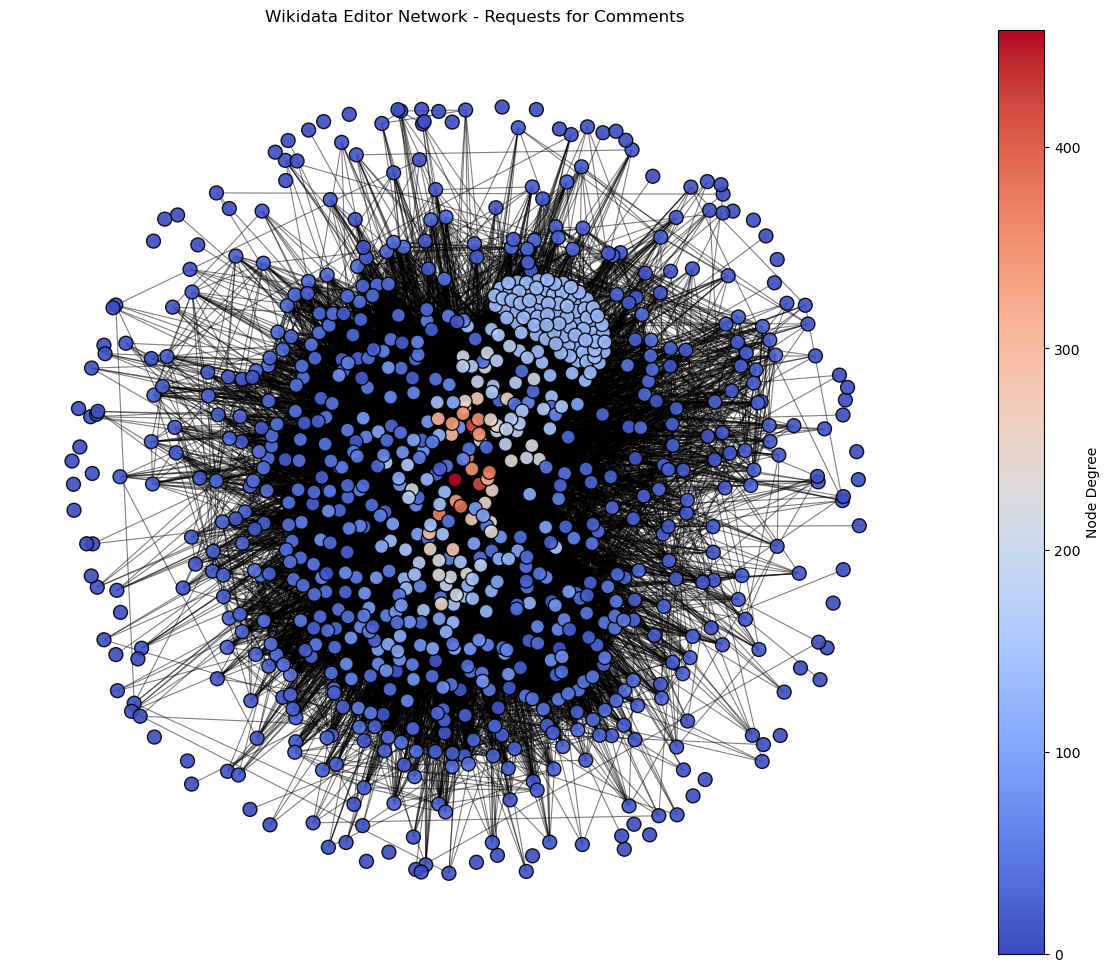

In [30]:
pos = nx.spring_layout(RFC_Graph, seed=42, k=1.1, iterations=100)

fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(RFC_Graph.degree())
node_colors = [node_degrees[n] for n in RFC_Graph.nodes()]

nx.draw_networkx_nodes(
    RFC_Graph, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    RFC_Graph, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - Requests for Comments")

plt.show()

#### 1.3.3 Degree by user

In [31]:
degree = {node: RFC_Graph.degree(node) for node in RFC_Graph.nodes()}
print(degree)

{'Emw': 104, 'Anonymous_username_598': 136, 'Chris.urs-o': 24, 'Ivan Shmakov': 44, 'Vysotsky': 36, 'Vacation9': 52, 'Erik Wannee': 22, 'Pavlov2': 0, 'Tobias1984': 157, 'Peter17': 20, 'Wikisaurus': 136, 'Averater': 25, 'Frigotoni': 63, 'Nomen ad hoc': 14, '관인생략': 4, 'Capmo': 4, 'Discasto': 49, 'FunPika': 39, 'Paqpaq94': 0, 'AdamBMorgan': 29, 'Filceolaire': 274, 'odder': 40, 'Senechthon': 136, 'קיין ומוויסנדיק פּרעפֿערענצן': 0, 'JackPotte': 51, 'Lsj': 29, 'EugeneZelenko': 45, 'The Anome': 44, 'Miodzio3': 136, '78.55.43.91': 22, 'Lucas Werkmeister': 13, 'Vahurzpu': 34, 'B25es': 34, 'Stevenliuyi': 217, 'XXN': 136, 'Nouill': 163, 'Ymblanter': 418, 'O.Taris': 136, 'Anonymous_username_611': 0, 'Vlsergey': 28, 'Wallacegromit1': 34, 'LZ6387': 44, 'Artoria2e5': 6, '109.247.163.112': 13, 'Reaper35': 15, 'WolfgangRieger': 29, 'Muhammad Abul-Futooh': 5, 'Bever': 26, 'Rondador': 62, 'Matthew hk': 5, 'Jura1': 321, 'TiagoLubiana': 34, 'Matěj Suchánek': 175, 'Markus Krötzsch': 151, 'Arkanosis': 84, 'Pa

#### 1.3.4 Top 5 Contributors

In [32]:
top_contributors = Counter(degree).most_common(5)
print(top_contributors)

[('Rschen7754', 458), ('ArthurPSmith', 423), ('Ymblanter', 418), ('Stryn', 383), ('TomT0m', 374)]


#### 1.3.5 Average Clustering Coefficient

In [33]:
avg_clustering = nx.average_clustering(RFC_Graph)
print("Average Clustering Coefficient:", avg_clustering)


Average Clustering Coefficient: 0.7818077578450455


#### 1.3.6 Number of Connected Components

In [34]:
num_components = nx.number_connected_components(RFC_Graph)
largest_component_size = len(max(nx.connected_components(RFC_Graph), key=len))

print("Number of Connected Components:", num_components)
print("Size of Largest Connected Component:", largest_component_size)

Number of Connected Components: 54
Size of Largest Connected Component: 833


#### 1.3.7 Betweenness Centrality

In [35]:
betweenness_centrality = nx.betweenness_centrality(RFC_Graph)
betweenness_centrality_top5 = Counter(betweenness_centrality).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5)

Betweenness Centrality Top 5: [('ArthurPSmith', 0.05670165049622737), ('Ymblanter', 0.041074190866777514), ('Rschen7754', 0.037914641944748285), ('ChristianKl', 0.03610823450856508), ('GZWDer', 0.03350520090443833)]


### 1.4 Random Network | Request for Comments

#### 1.4.1 Graph Generation

In [38]:
N = RFC_Graph.number_of_nodes()
E = RFC_Graph.number_of_edges()
RFC_random = nx.gnm_random_graph(N, E)

print("Number of nodes:", RFC_random.number_of_nodes())
print("Number of edges:", RFC_random.number_of_edges())

Number of nodes: 888
Number of edges: 27569


#### 1.4.2 Graph Visualization

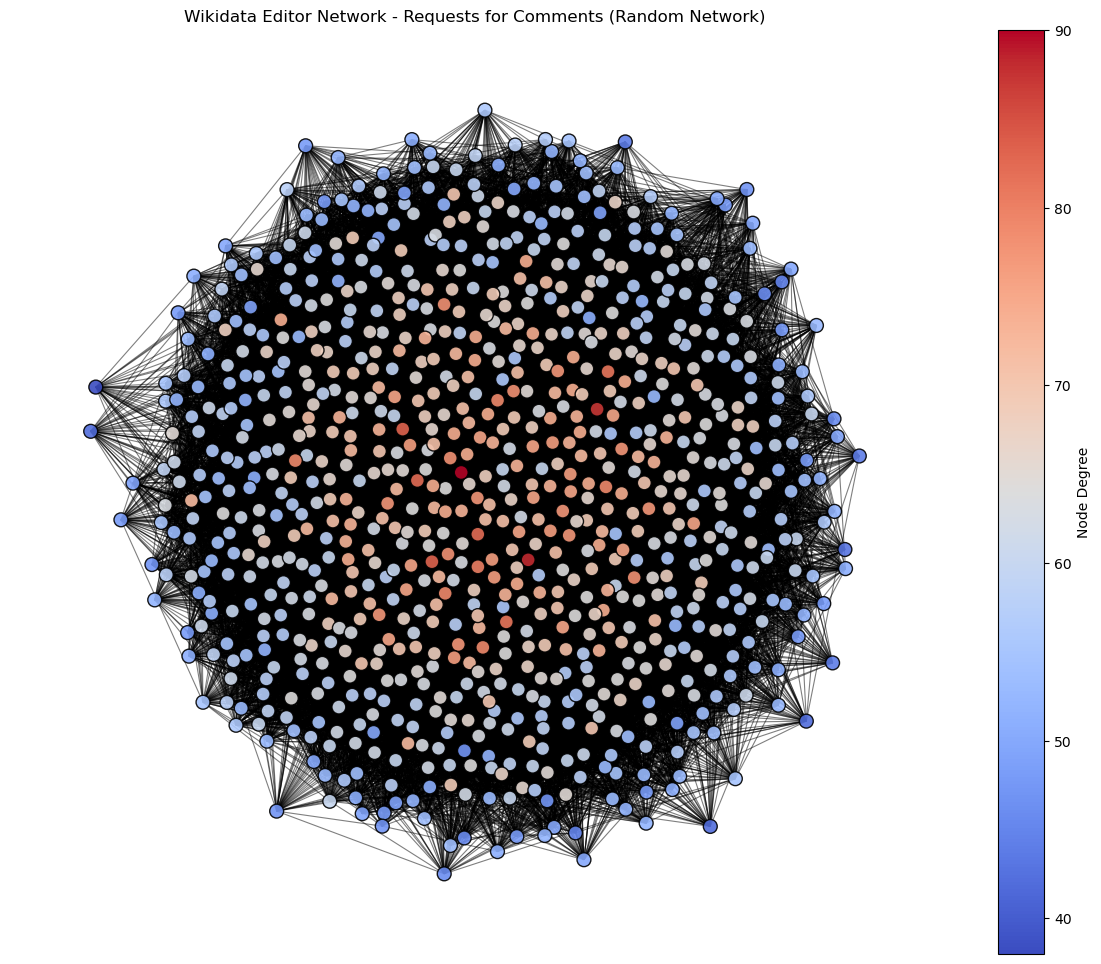

In [39]:
pos = nx.spring_layout(RFC_random, seed=42, k=1.1, iterations=100)

fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(RFC_random.degree())
node_colors = [node_degrees[n] for n in RFC_random.nodes()]

nx.draw_networkx_nodes(
    RFC_random, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    RFC_random, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - Requests for Comments (Random Network)")

plt.show()

#### 1.4.3 Degree by user

In [45]:
degree_random_RFC = {node: RFC_random.degree(node) for node in RFC_random.nodes()}
print(degree_random_RFC)

{0: 49, 1: 74, 2: 51, 3: 60, 4: 65, 5: 59, 6: 66, 7: 61, 8: 60, 9: 71, 10: 57, 11: 54, 12: 63, 13: 60, 14: 53, 15: 69, 16: 74, 17: 74, 18: 53, 19: 76, 20: 64, 21: 49, 22: 65, 23: 74, 24: 53, 25: 68, 26: 55, 27: 64, 28: 56, 29: 54, 30: 74, 31: 60, 32: 72, 33: 62, 34: 65, 35: 55, 36: 56, 37: 69, 38: 66, 39: 62, 40: 63, 41: 48, 42: 65, 43: 53, 44: 78, 45: 56, 46: 67, 47: 57, 48: 61, 49: 77, 50: 59, 51: 62, 52: 55, 53: 75, 54: 55, 55: 58, 56: 60, 57: 53, 58: 68, 59: 67, 60: 49, 61: 65, 62: 74, 63: 62, 64: 61, 65: 65, 66: 59, 67: 57, 68: 72, 69: 58, 70: 60, 71: 79, 72: 62, 73: 68, 74: 67, 75: 66, 76: 48, 77: 70, 78: 61, 79: 64, 80: 68, 81: 63, 82: 68, 83: 53, 84: 59, 85: 73, 86: 63, 87: 69, 88: 52, 89: 63, 90: 59, 91: 65, 92: 58, 93: 67, 94: 66, 95: 73, 96: 65, 97: 55, 98: 59, 99: 46, 100: 46, 101: 58, 102: 56, 103: 68, 104: 55, 105: 69, 106: 66, 107: 66, 108: 57, 109: 64, 110: 53, 111: 69, 112: 58, 113: 67, 114: 57, 115: 57, 116: 63, 117: 60, 118: 54, 119: 67, 120: 60, 121: 65, 122: 62, 12

#### 1.4.4 Top 5 Contributors

In [46]:
top_contributors_random_RFC = Counter(degree_random_RFC).most_common(5)
print(top_contributors_random_RFC)

[(823, 90), (132, 88), (376, 87), (568, 83), (772, 83)]


#### 1.4.5 Average Clustering Coefficient

In [47]:
avg_clustering_random_RFC = nx.average_clustering(RFC_random)
print("Average Clustering Coefficient:", avg_clustering_random_RFC)


Average Clustering Coefficient: 0.06993390431941031


#### 1.4.6 Number of Connected Components

In [48]:
num_components_random_RFC = nx.number_connected_components(RFC_random)
largest_component_size_random_RFC = len(max(nx.connected_components(RFC_random), key=len))

print("Number of Connected Components:", num_components_random_RFC)
print("Size of Largest Connected Component:", largest_component_size_random_RFC)

Number of Connected Components: 1
Size of Largest Connected Component: 888


#### 1.4.7 Betweenness Centrality

In [49]:
betweenness_centrality_random_RFC = nx.betweenness_centrality(RFC_random)
betweenness_centrality_top5_random_RFC = Counter(betweenness_centrality_random_RFC).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_random_RFC)

Betweenness Centrality Top 5: [(823, 0.002273286050546465), (132, 0.002091544461535513), (376, 0.001988701396669736), (568, 0.0019652482488110414), (772, 0.0019086237722774268)]
